In [1]:
import sys
import nltk
import numpy as np
import matplotlib.pyplot as plt
import operator
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tfidfconfig
sys.path.append('../../') 
from utils import Utils
utils_obj = Utils()


## preprocessing steps
1. Converting to lower case
2. Removing noise like "REDACTED".
3. Removing punctuations. Observed that at some places there was a space missing after "," so on removing comma, the words were getting joined. To overcome that, we replace "," with " " and in the end we remove all multiple spaces with single space. Also replacing n't with not
4. Removing stopwords


In [2]:
df = utils_obj.load_data("../../Dataset/sentisum-assessment-dataset.csv")
documents = df['documents']
processed_documents = utils_obj.preprocess_docs(documents)


In [3]:
vectorizer = TfidfVectorizer(lowercase=True,
                                max_features=tfidfconfig.MAX_FEATURES,
                                max_df=tfidfconfig.MAX_DF,
                                min_df=tfidfconfig.MIN_DF,
                                ngram_range=(1,3),
                                stop_words="english"
                            )
vectors = vectorizer.fit_transform(processed_documents)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
all_keywords = []
for description in denselist:
    x=0
    keywords=[]
    for word in description:
        if word>0:
            keywords.append(feature_names[x])
        x+=1
    all_keywords.append(keywords)
print(documents[0])
print(all_keywords[0])

Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.
['arranged', 'choice', 'day', 'delivered', 'experience', 'fitted', 'free', 'garage', 'time', 'tire', 'went']


In [4]:
true_k = tfidfconfig.NO_OF_CLUSTERS
model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)
model.fit(vectors)
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

with open("tfidf-clusters.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i,:15]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

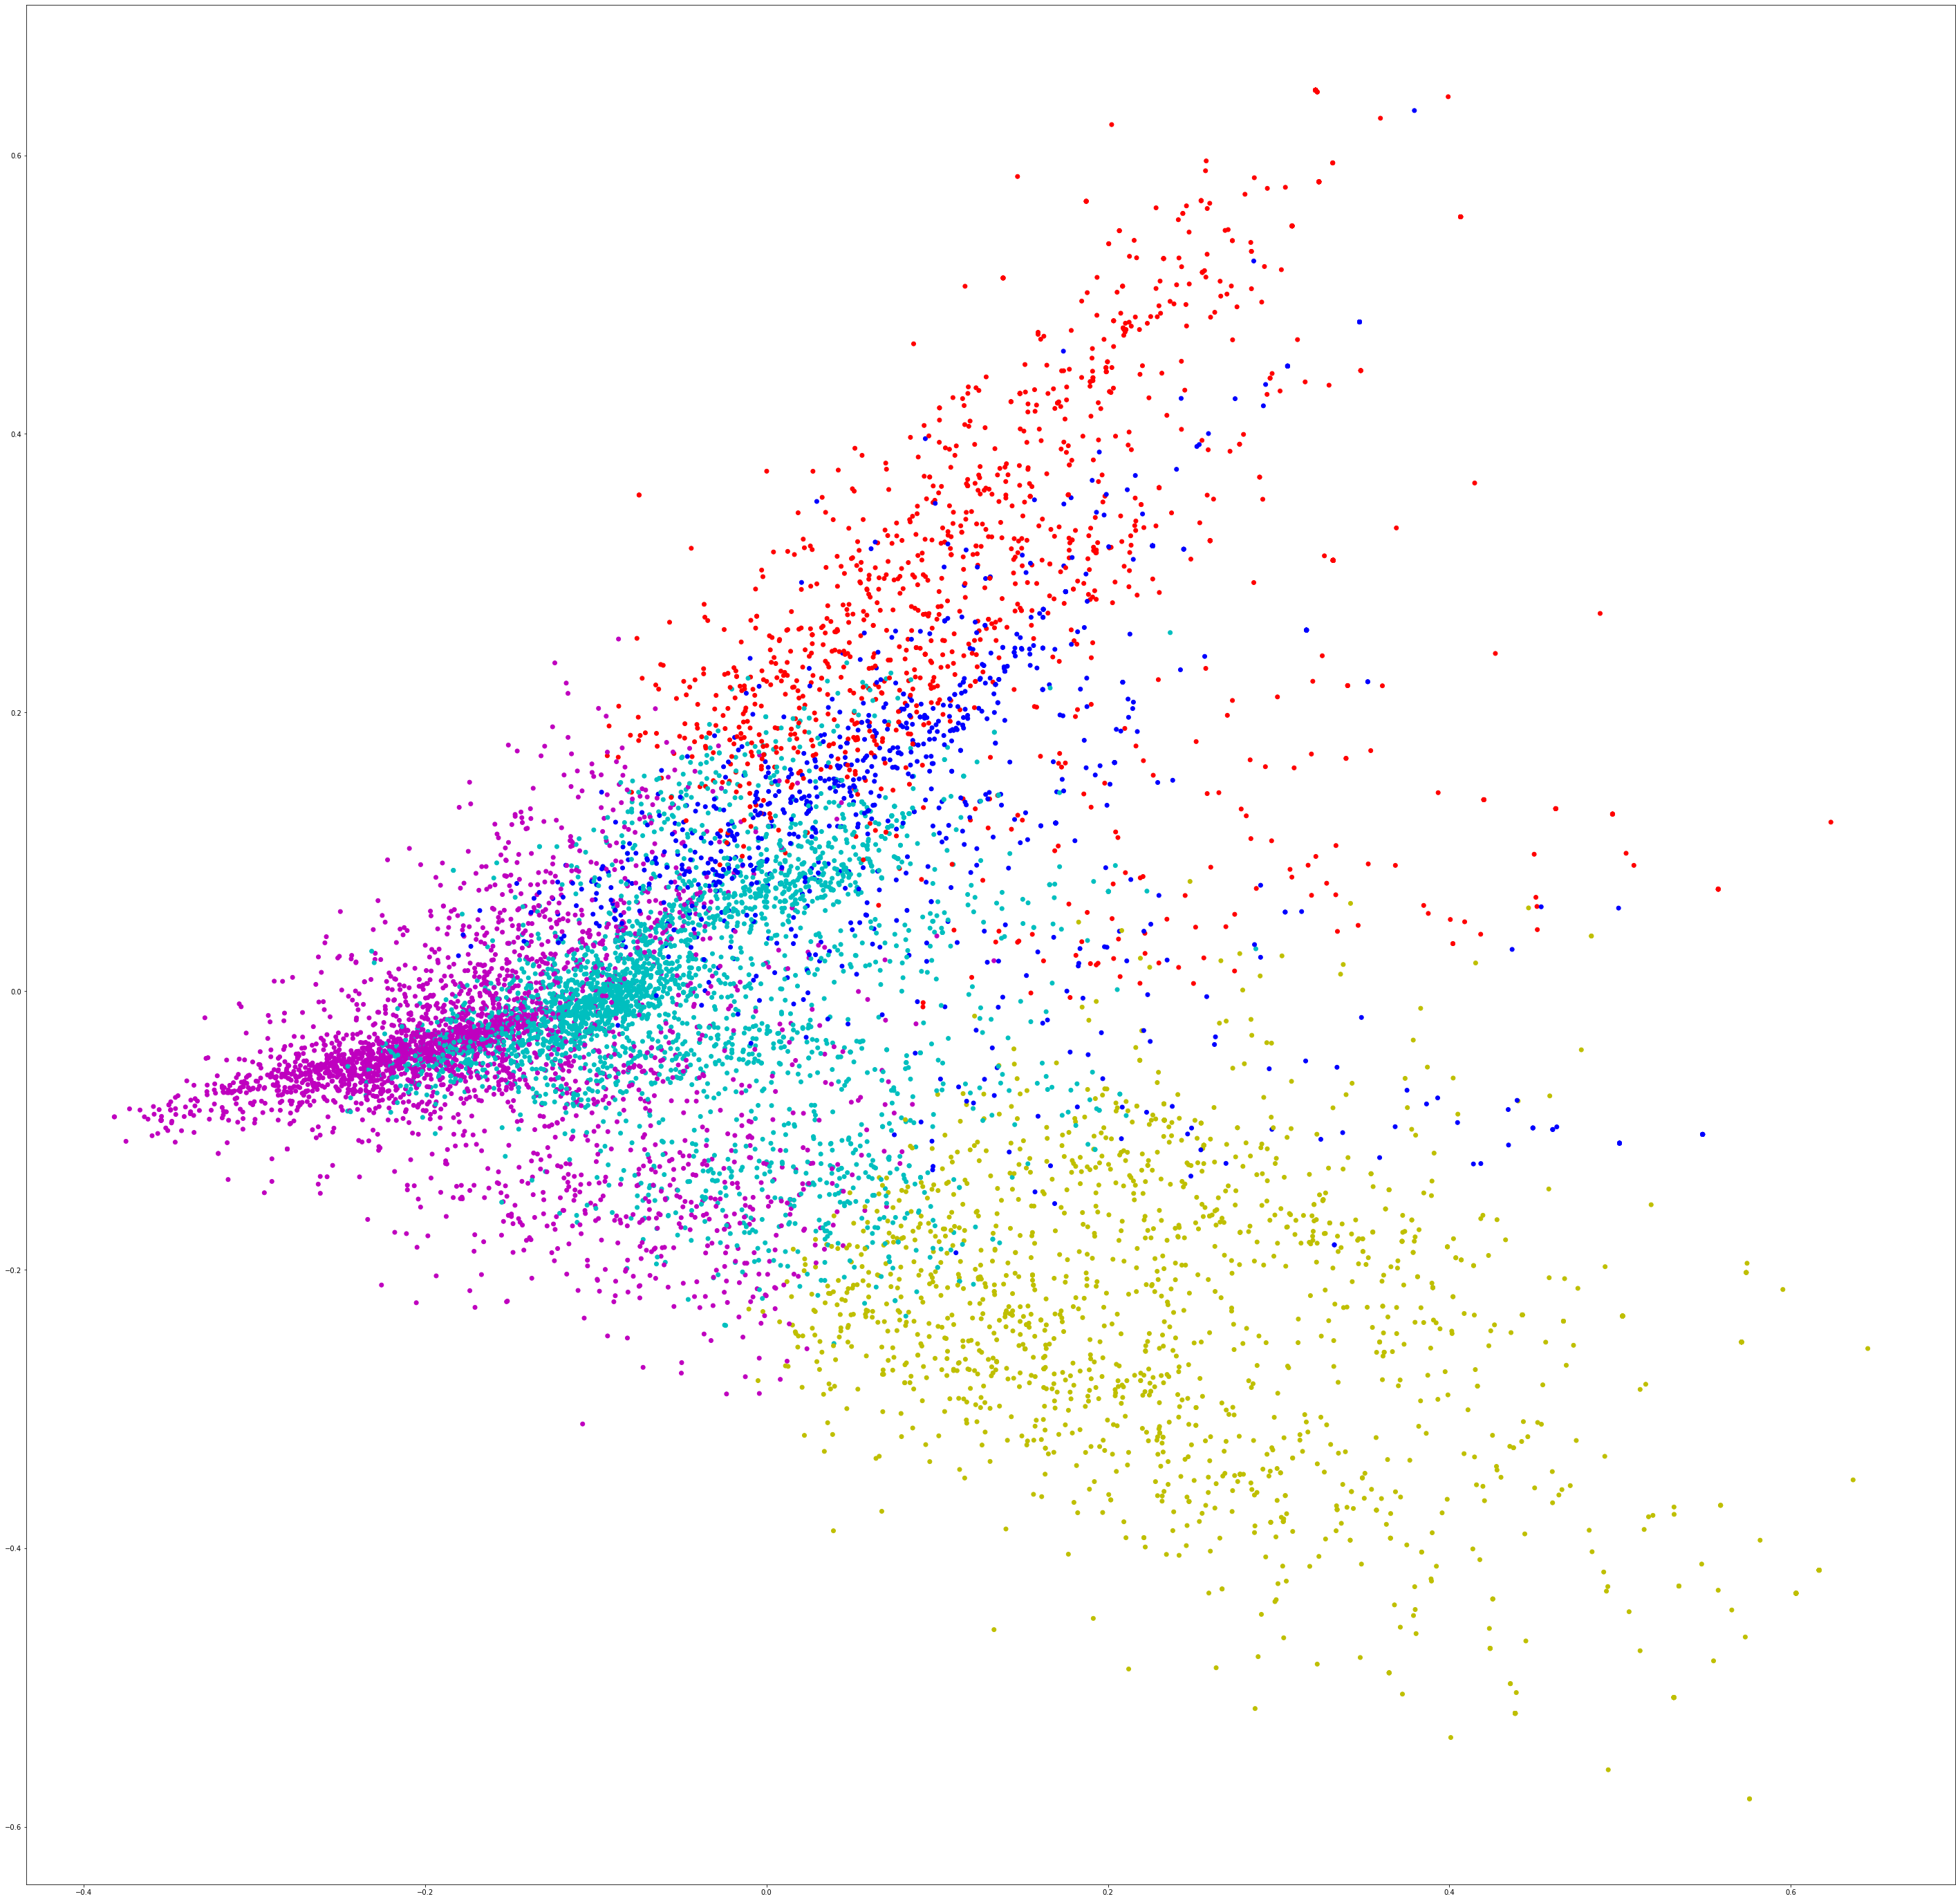

In [5]:
kmean_indices = model.fit_predict(vectors)
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())
colours = ["r", "b", "c", "y", "m"]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(50,50))
#ax.scatter(x_axis, y_axis, c=kmean_indices, cmap='Set2')
ax.scatter(x_axis, y_axis, c=[colours[d] for d in kmean_indices])